# Data Analysis

In this interactive notebook, we perform analysis on the data that we merged in the [previous notebook](data-merging.ipynb). Here, we aim to perform some analysis on the merged and cleaned data, producing some visualizations and important statistical information to help us answer some of the questions outlined in the [ReadMe](README.md).

----

Let's start by importing the required libraries.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context('talk')

In [3]:
%matplotlib inline

Let us now import our cleaned and merged data from the pickle file stored at [cleaned_data/final_data_merged.pkl](./cleaned_data/final_data_merged.pkl).

In [4]:
final_data = pd.read_pickle('cleaned_data/final_data_merged.pkl')

In [5]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09


We can encapsulate some of the budgeting and revenue information into the return on investment, which we will store in a new field for later use in plotting.

In [6]:
final_data['ROI'] = ((final_data['worldwide_gross']
                      - final_data['production_budget'])
                     / final_data['production_budget']) * 100

In [7]:
final_data.head(10)

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04,-99.836209
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06,-62.746792
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08,106.440860
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07,121.816382
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,666.909239
62,tt0376136,The Rum Diary,The Rum Diary,2011,"[Comedy, Drama]",[nm0732430],"[nm0732430, nm0860219]",6.2,94787.0,2011-10-28,45000000.0,13109815.0,2.154473e+07,-52.122818
67,tt0383010,The Three Stooges,The Three Stooges,2012,"[Comedy, Family]","[nm0268380, nm0268370]","[nm0148808, nm0268370, nm0268380]",5.1,28570.0,2012-04-13,30000000.0,44338224.0,5.405225e+07,80.174163
69,tt0393049,Anderson's Cross,Anderson's Cross,2010,"[Comedy, Drama, Romance]",[nm1516329],[nm1516329],5.5,106.0,2010-12-31,300000.0,0.0,0.000000e+00,-100.000000
71,tt0398286,Tangled,Tangled,2010,"[Adventure, Animation, Comedy]","[nm1977355, nm0397174]","[nm1557594, nm0342278, nm0342303]",7.8,366366.0,2010-11-24,260000000.0,200821936.0,5.864772e+08,125.568169
73,tt0401729,John Carter,John Carter,2012,"[Action, Adventure, Sci-Fi]",[nm0004056],"[nm0004056, nm0028764, nm0149290, nm0123194]",6.6,241792.0,2012-03-09,275000000.0,73058679.0,2.827781e+08,2.828400


Somehow, we need to best make use of our genre descriptors. We currently have lists of strings, and it would be nice to produce some sort of histogram using this information. Let's try flattening out our genre descriptions into dummy variables. We have to do a bit of additional processing to make the input suitable for Pandas's `get_dummies` function.

In [8]:
genre_dummies = pd.get_dummies(final_data.genres.apply(pd.Series).stack()).sum(level=0)

In [9]:
genre_dummies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
20,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
54,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
genre_dummies.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

Let's join our original merged data with our genre dummies, so that we can look at some summary information.

In [11]:
final_with_genre_dummies = final_data.join(genre_dummies, how='outer')

We might also want to take a look at a correlation table, to see if there are any variables that are obviously correlated, and that we can explore later on.

In [12]:
correl_table = final_data.corr()
correl_table

,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ROI
start_year,1.000000,0.048592,-0.043684,0.102462,0.104921,0.115488,0.031860
averagerating,0.048592,1.000000,0.464911,0.209422,0.287181,0.270930,0.026794
numvotes,-0.043684,0.464911,1.000000,0.554988,0.653605,0.642382,0.089905
production_budget,0.102462,0.209422,0.554988,1.000000,0.724452,0.792679,-0.020642
domestic_gross,0.104921,0.287181,0.653605,0.724452,1.000000,0.947475,0.120453
worldwide_gross,0.115488,0.270930,0.642382,0.792679,0.947475,1.000000,0.103602
ROI,0.031860,0.026794,0.089905,-0.020642,0.120453,0.103602,1.000000


Let's do the same thing with the dataframe involving the genre dummies. In this case, we will do some subsetting so that we can get the 10 genres with the largest correlation to the return on investment.

In [13]:
correl_with_dummies = final_with_genre_dummies.corr()
correl_with_dummies.loc['Action':'Western', 'ROI'].nlargest(10)

Mystery      0.149433
Horror       0.143449
Thriller     0.085869
Romance      0.004900
Animation    0.002419
Sport       -0.001042
Music       -0.002574
Sci-Fi      -0.007390
Biography   -0.007580
Musical     -0.012171
Name: ROI, dtype: float64

In particular, it seems as though Myster and Horror films are slightly more profitable than the remaining genres. For a more visual description of the data, however, we should probably do a bit of plotting. Since we are going to want to plot within genres, we might want to store the number of different possible genres so that we can easily know how many subplots we will need.

In [14]:
num_subplots = len(genre_dummies.columns)
num_subplots

21

Now, we can loop through the possible genres, and consider a correlation plot between the date of release and the return on investment.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


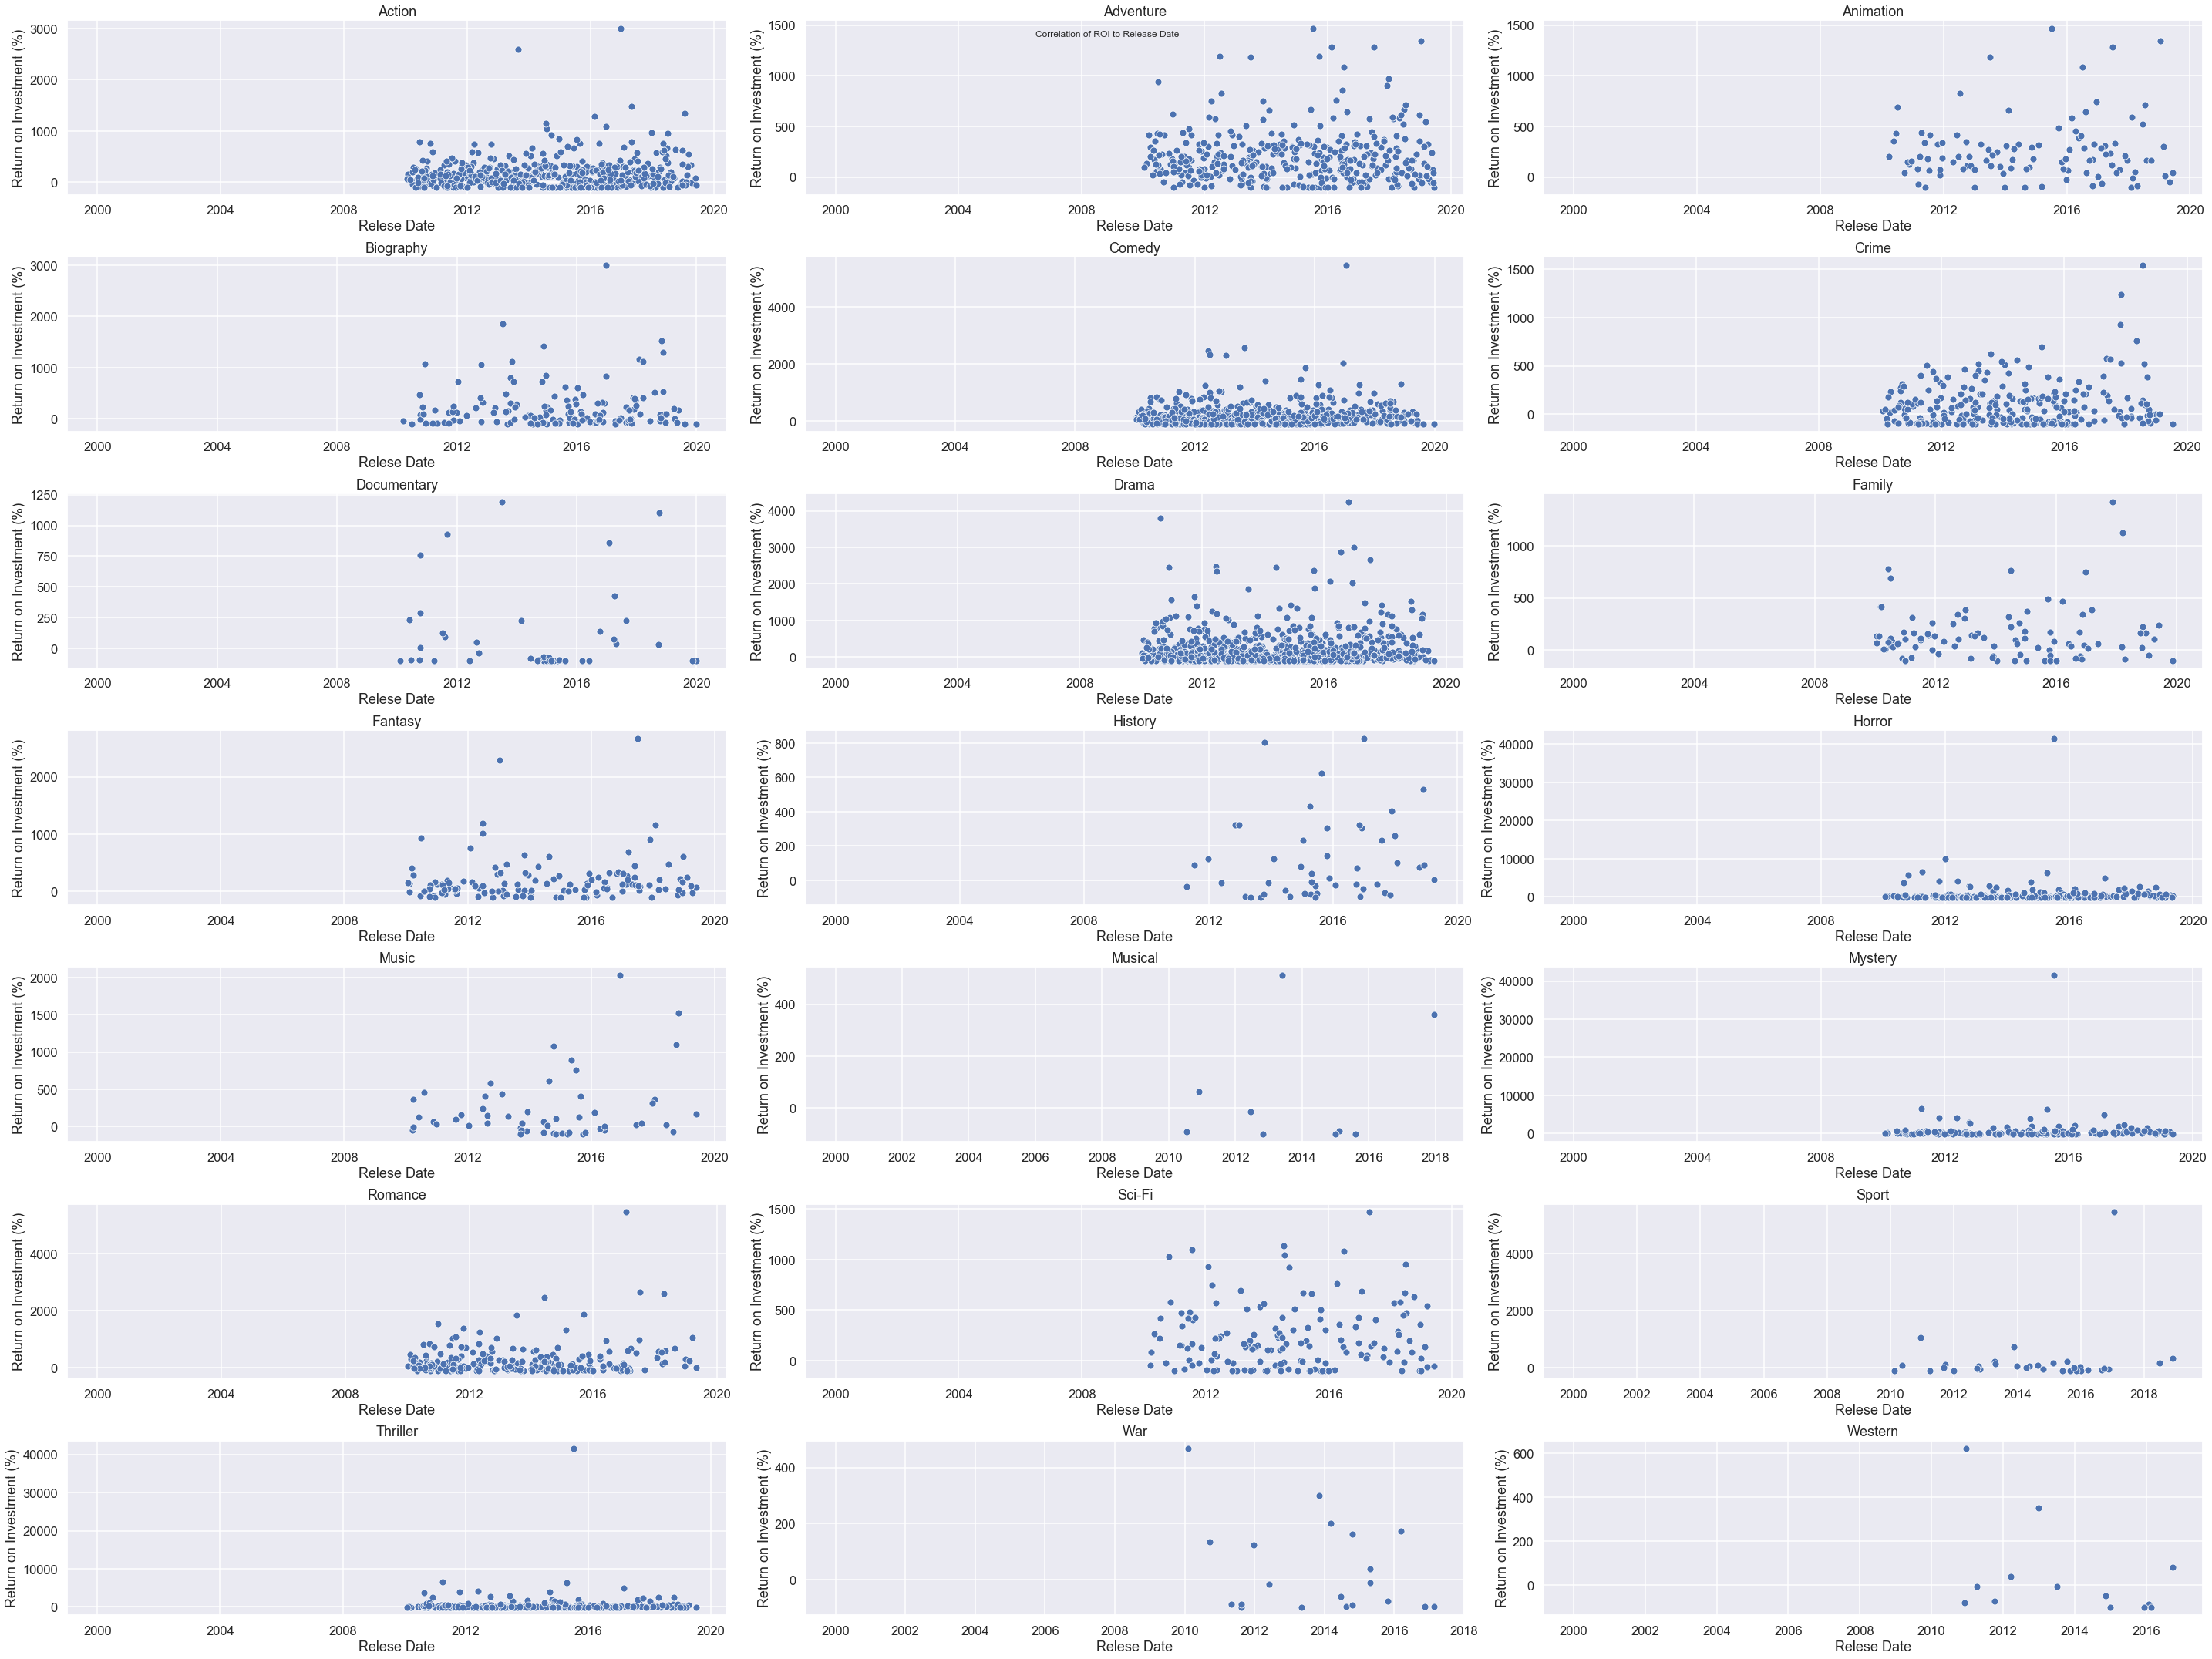

In [15]:
rows = 7
cols = 3
genre_subset_f, genre_subset_ax = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    sns.scatterplot(x='release_date', y='ROI', data=cur_subset, ax=cur_ax)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Relese Date')
    cur_ax.set_ylabel('Return on Investment (%)')

genre_subset_f.suptitle('Correlation of ROI to Release Date')
genre_subset_f.tight_layout()

This data helps to illustrate a few facts. For one, there is no strong correlation between the date of release and the return on investment, which suggests that within the given timeframe, the relative popularity of any given genre doesn't seem to be changing. This plot also illustrates the presence of a few outliers which may be affecting the data analysis adversely.

In [16]:
final_data['release_year'] = final_data.release_date.dt.year

In [17]:
final_data.groupby('release_year').describe()

start_year                                                  \
                  count         mean       std     min      25%     50%   
release_year                                                              
2010              175.0  2010.085714  0.650880  2010.0  2010.00  2010.0   
2011              201.0  2010.860697  0.361244  2010.0  2011.00  2011.0   
2012              197.0  2011.873096  0.856629  2010.0  2012.00  2012.0   
2013              197.0  2012.730964  0.737969  2010.0  2013.00  2013.0   
2014              213.0  2013.713615  0.775602  2010.0  2014.00  2014.0   
2015              255.0  2014.313725  1.281150  2010.0  2014.00  2015.0   
2016              179.0  2015.530726  1.172199  2010.0  2016.00  2016.0   
2017              132.0  2016.348485  1.620408  2010.0  2016.00  2017.0   
2018              119.0  2017.453782  1.640318  2010.0  2018.00  2018.0   
2019               42.0  2017.333333  2.902200  2010.0  2017.25  2019.0   

                             averagerating            ... worldwide_gross  \
                 75%     max         count      mean  ...             75%   
release_year                                          ...                   
2010          2010.0  2017.0         175.0  6.194857  ...     147451695.5   
2011          2011.0  2012.0         201.0  6.294030  ...     118729073.0   
2012          2012.0  2019.0         197.0  6.216751  ...     133085295.0   
2013          2013.0  2015.0         197.0  6.201523  ...     127983283.0   
2014          2014.0  2017.0         213.0  6.355869  ...     111946251.0   
2015          2015.0  2017.0         255.0  5.916863  ...      67973090.0   
2016          2016.0  2017.0         179.0  6.310615  ...     145075382.5   
2017          2017.0  2019.0         132.0  6.337121  ...     242732923.0   
2018          2018.0  2019.0         119.0  6.311765  ...     180655404.0   
2019          2019.0  2019.0          42.0  6.323810  ...     118055757.5   

                              ROI                                              \
                       max  count        mean          std    min         25%   
release_year                                                                    
2010          1.068880e+09  175.0  218.498954   596.531301 -100.0  -15.394588   
2011          1.123791e+09  201.0  190.738618   594.867565 -100.0  -53.183722   
2012          1.517936e+09  197.0  271.163092   876.672379 -100.0  -49.066667   
2013          1.272470e+09  197.0  191.269182   422.672506 -100.0  -59.148083   
2014          1.104039e+09  213.0  177.674962   446.176564 -100.0  -94.246290   
2015          1.648855e+09  255.0  299.268800  2646.385969 -100.0 -100.000000   
2016          1.140069e+09  179.0  244.377970   541.392791 -100.0  -41.230350   
2017          1.259200e+09  132.0  366.966122   767.769123 -100.0   14.954915   
2018          2.048134e+09  119.0  305.297444   470.916246 -100.0    5.266511   
2019          1.123062e+09   42.0  150.715082   347.558441 -100.0  -90.802054   

                                                    
                     50%         75%           max  
release_year                                        
2010           83.243750  232.421949   5817.067733  
2011           80.738155  214.043708   6558.059067  
2012           68.449583  293.627420  10075.949000  
2013          100.703767  251.785447   2942.219367  
2014           54.872124  273.931388   3851.737231  
2015          -22.189083  188.249074  41556.474000  
2016           95.915130  293.698348   4249.700800  
2017          155.018377  385.728292   5479.296120  
2018          147.341730  509.658293   2617.924114  
2019            6.804755  237.636109   1344.091235  

[10 rows x 56 columns]

Let's now consider a further visualization of the return on investment over time broken up by genre. We may use Pandas's Grouper object to specify a custom grouping within business quarters. From here, we can plot the mean return on investment as develops within these quarters, broken into each specific genre.

This data reveals that many genres have suffered from long periods where the return on investment is not particularly high. While there are not really any trends indicating that one type of movie is becoming more popular than another, we can conclude from this plot that certain genres offer a higher probability of being successful in terms of the return on investment.

Similarly, we may want to consider if there are any trends in the average ratings over time, broken up by genre as well. In particular, we can group quarterly in the same fashion as we did previously, and consider instead the mean average rating development along these quarters.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


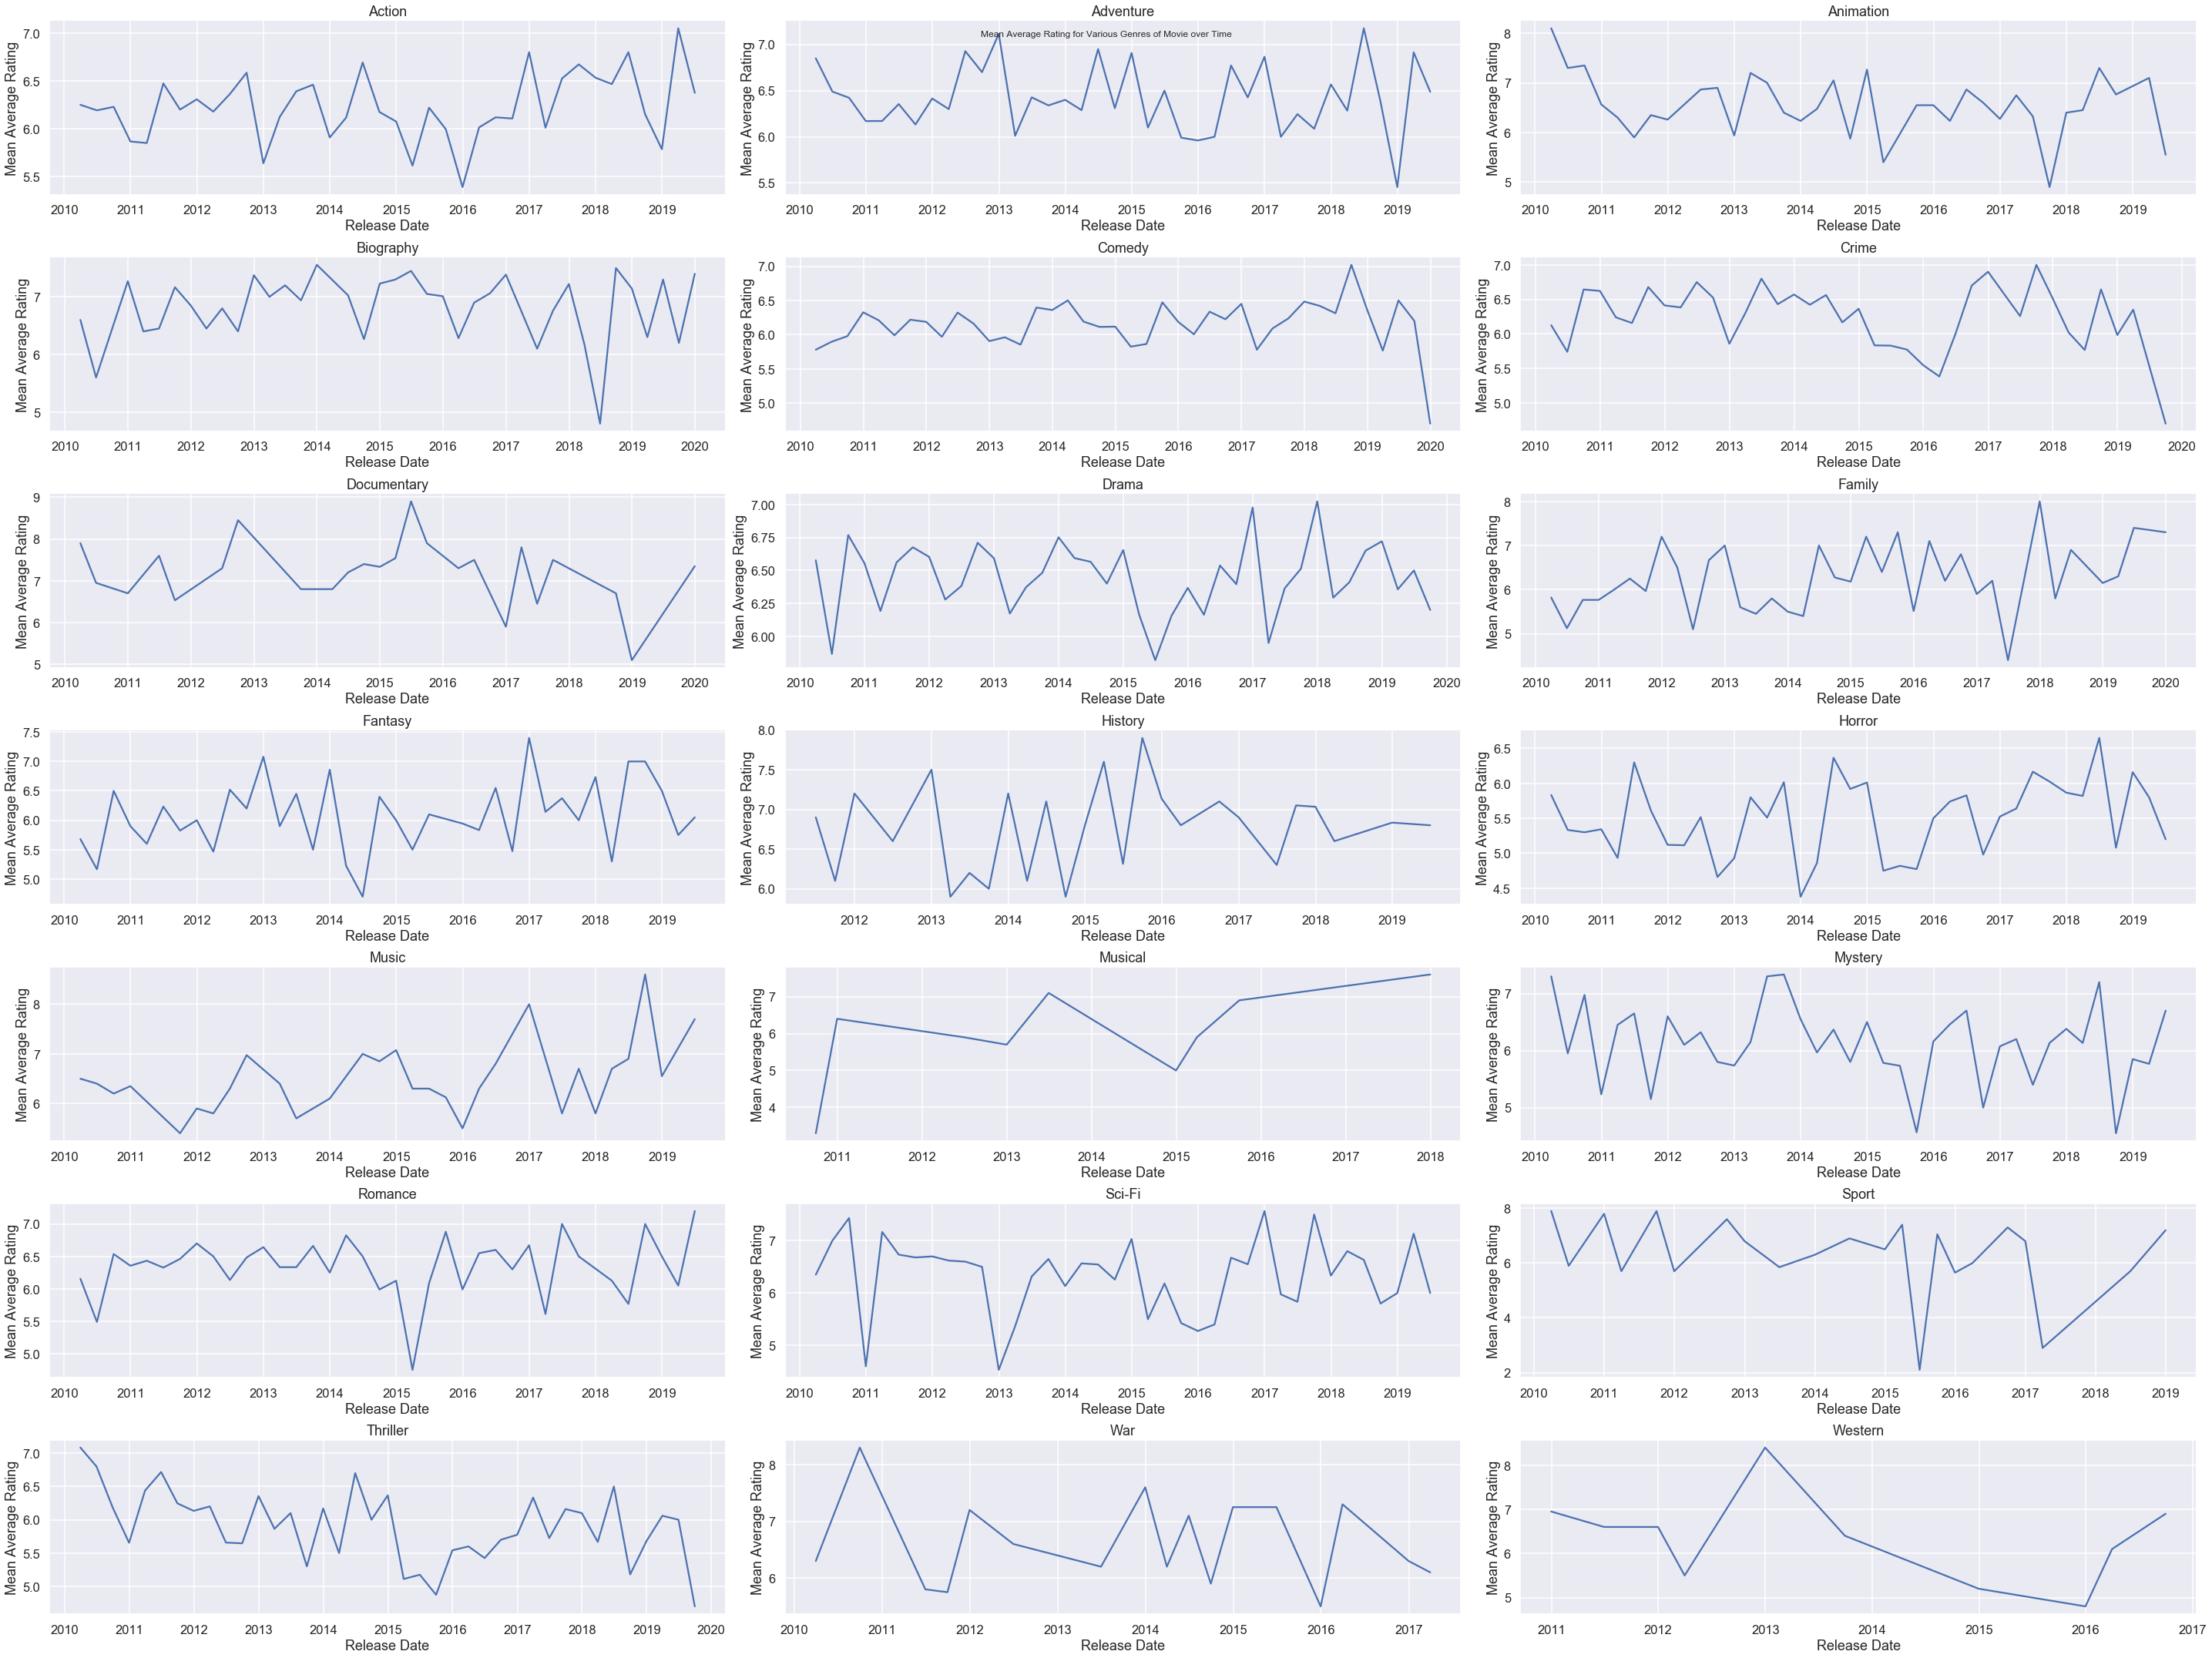

In [18]:
rows = 7
cols = 3
genre_subset_f3, genre_subset_ax3 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax3[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    grouped = cur_subset.groupby(pd.Grouper(key='release_date', freq='Q')).describe()['averagerating'].reset_index()
    grouped.dropna(subset=['mean'])
    sns.lineplot(x='release_date', y='mean', data=grouped, ax=cur_ax)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Release Date')
    cur_ax.set_ylabel('Mean Average Rating')

genre_subset_f3.suptitle('Mean Average Rating for Various Genres of Movie over Time')
genre_subset_f3.tight_layout()

Let's also take a look at some histograms of the average rating data.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


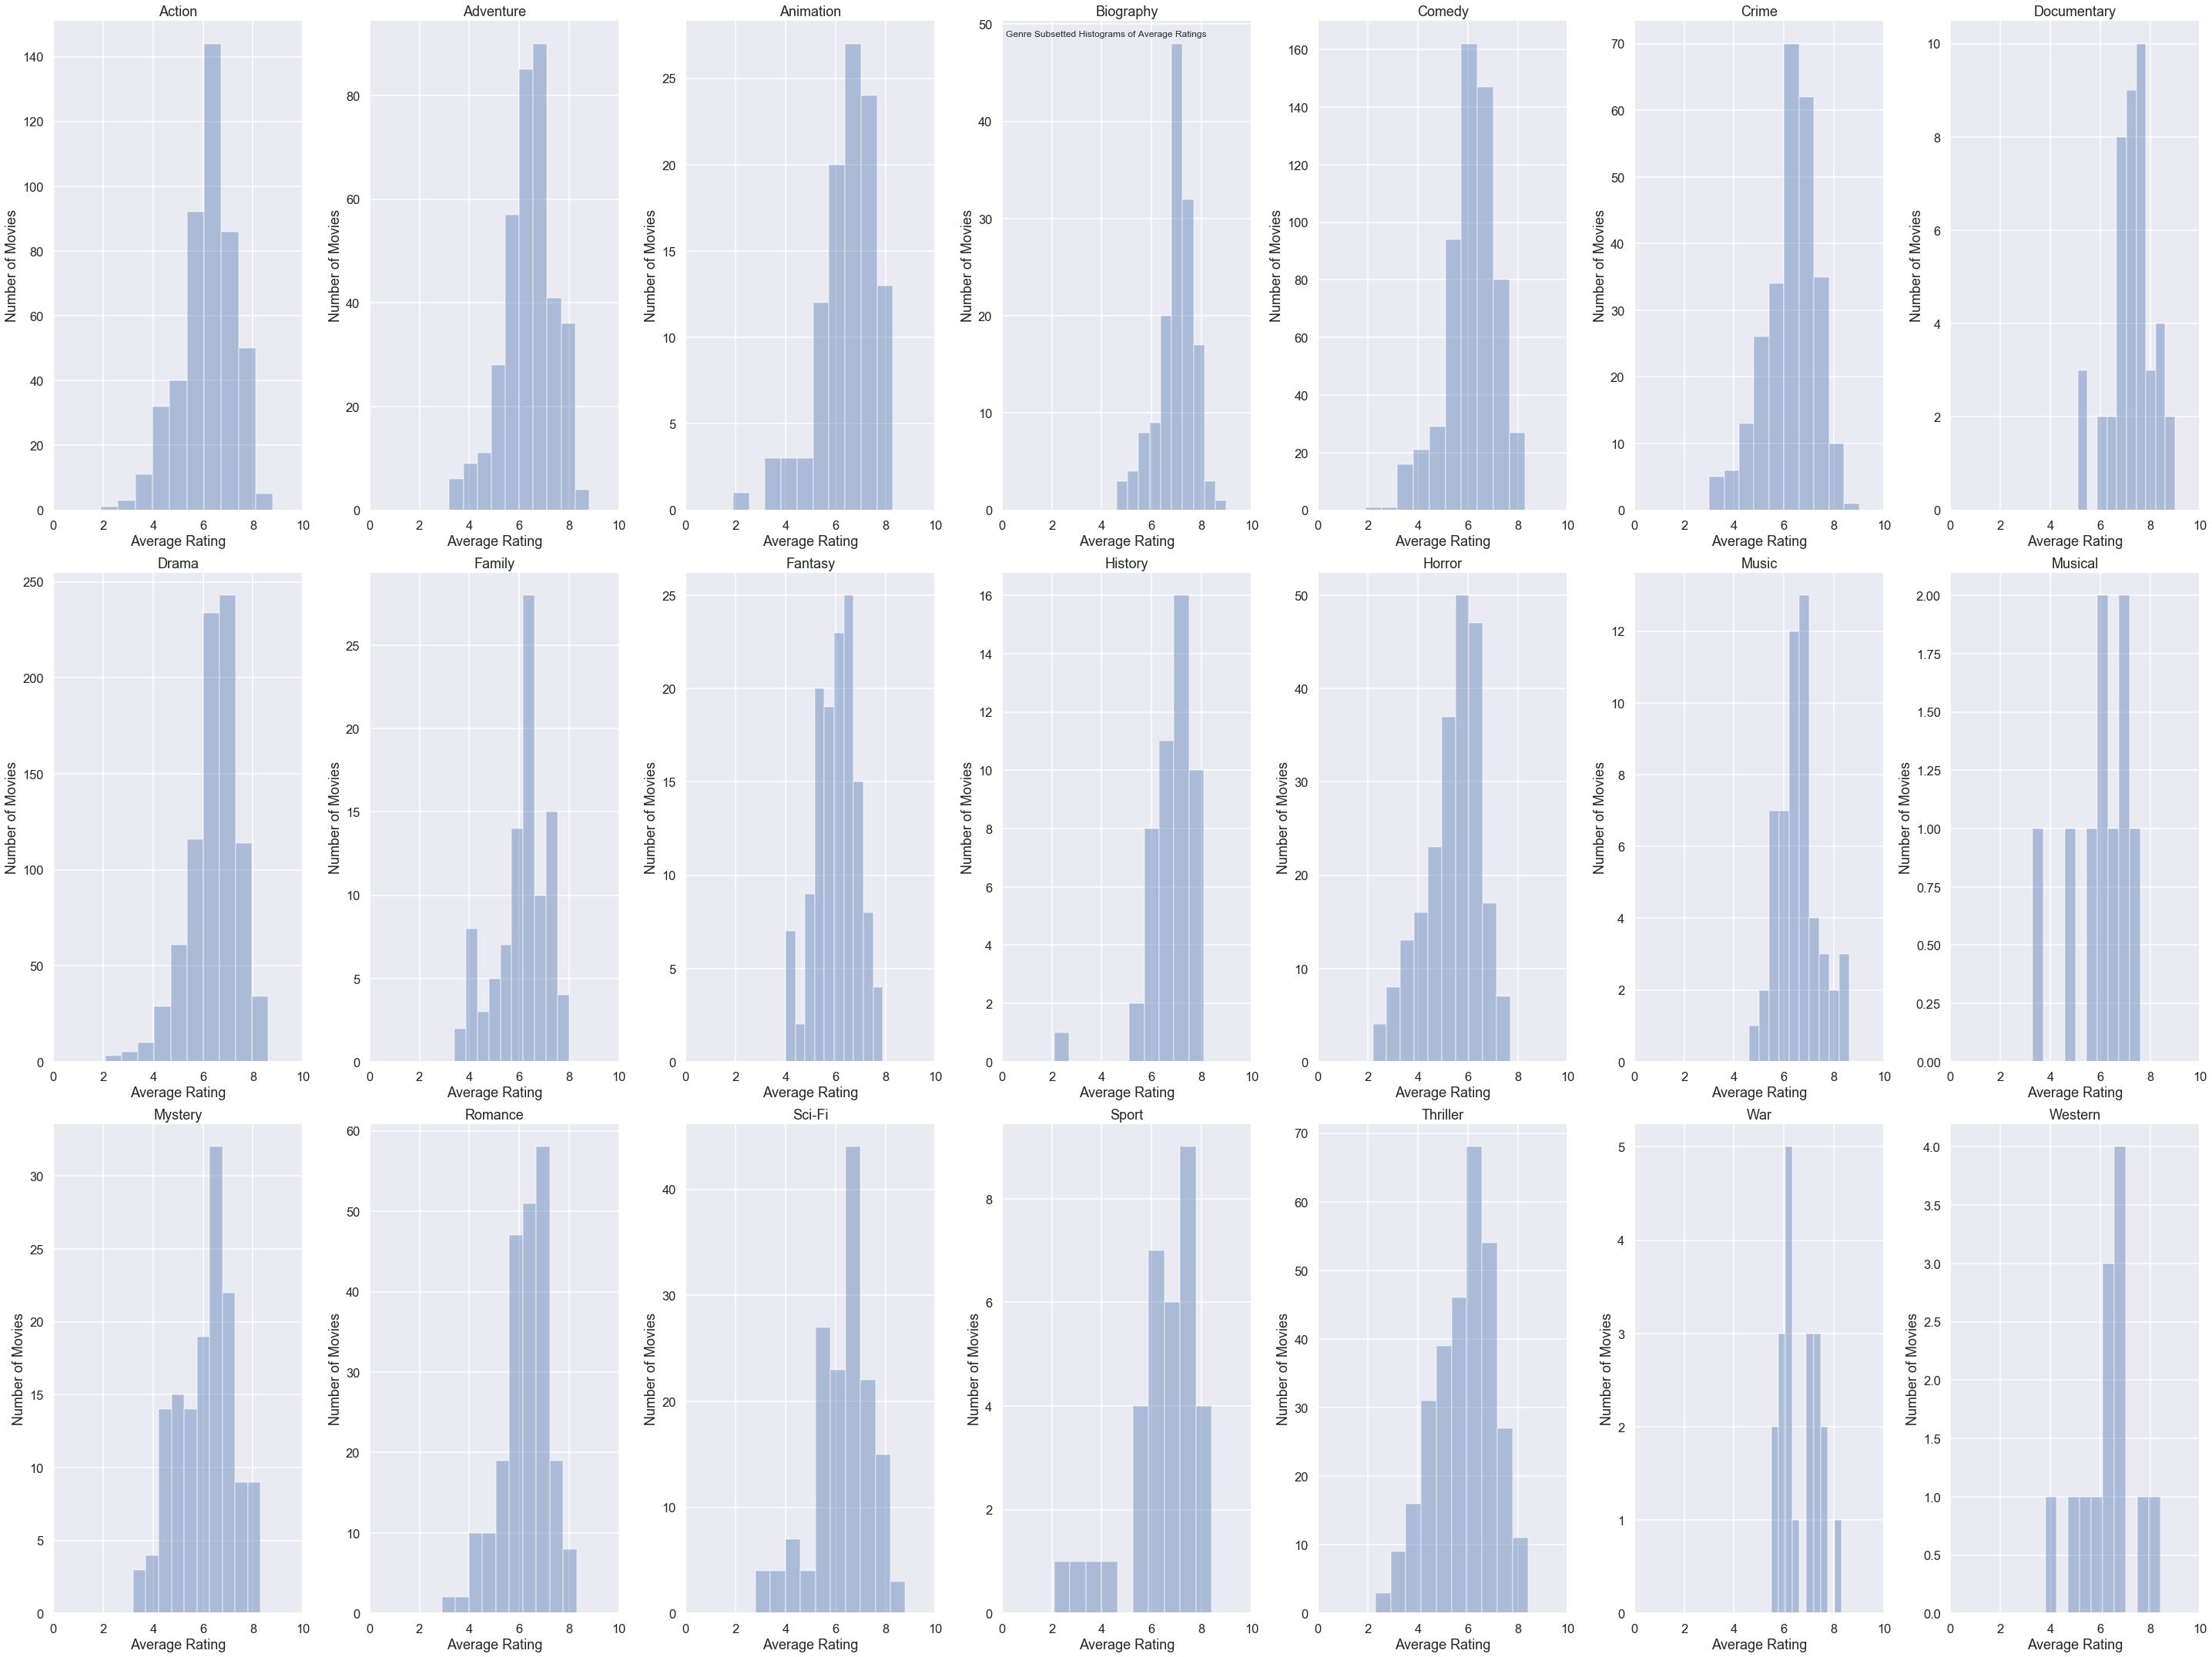

In [19]:
rows = 3
cols = 7
genre_subset_f4, genre_subset_ax4 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax4[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    sns.distplot(cur_subset.averagerating, kde=False, bins=10, ax=cur_ax)
    cur_ax.set_xlim(0,10)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Average Rating')
    cur_ax.set_ylabel('Number of Movies')

genre_subset_f4.suptitle('Genre Subsetted Histograms of Average Ratings')
genre_subset_f4.tight_layout()

We might also want to consider the full aggregation of the return on investment and average ratings by genre.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


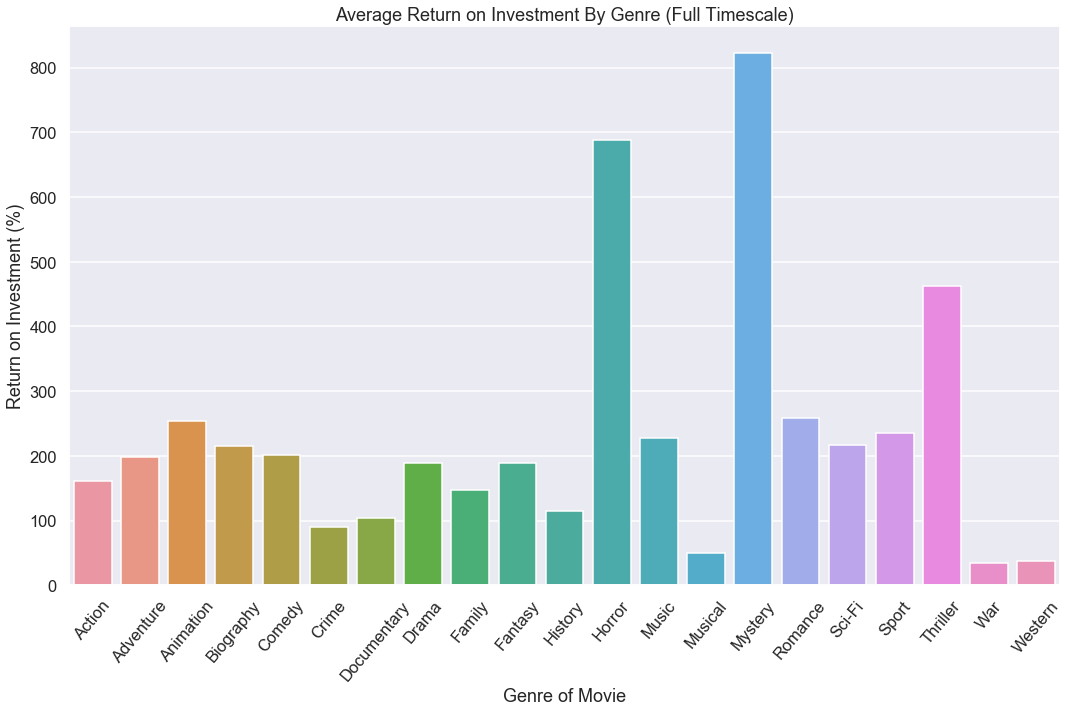

In [20]:
genre_subset_f5, genre_subset_ax5 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
mean_rois = []

for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1]
    mean_rois.append(cur_subset.ROI.mean())

sns.barplot(x=genre_dummies.columns, y=mean_rois)
genre_subset_ax5.set_title('Average Return on Investment By Genre (Full Timescale)')
genre_subset_ax5.set_xlabel('Genre of Movie')
genre_subset_ax5.set_ylabel('Return on Investment (%)')
genre_subset_ax5.tick_params(axis='x', labelrotation=50.0)
genre_subset_f5.tight_layout()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


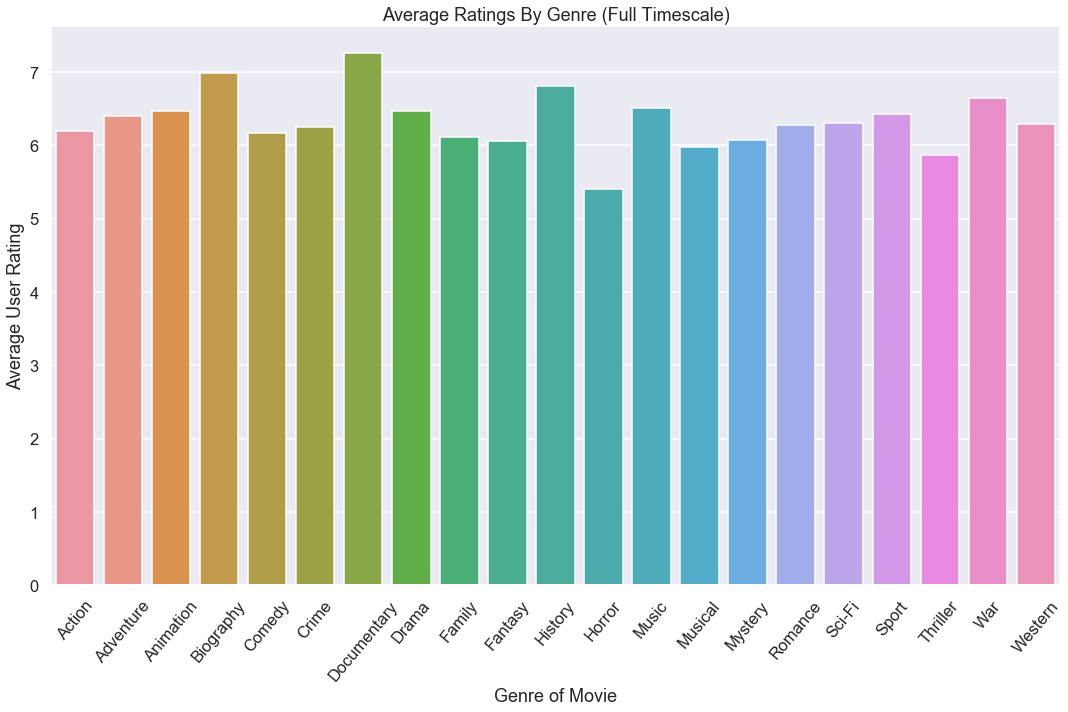

In [21]:
genre_subset_f6, genre_subset_ax6 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
mean_ratings = []

for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1]
    mean_ratings.append(cur_subset.averagerating.mean())

sns.barplot(x=genre_dummies.columns, y=mean_ratings)
genre_subset_ax6.set_title('Average Ratings By Genre (Full Timescale)')
genre_subset_ax6.set_xlabel('Genre of Movie')
genre_subset_ax6.set_ylabel('Average User Rating')
genre_subset_ax6.tick_params(axis='x', labelrotation=50.0)
genre_subset_f6.tight_layout()

Let's finally consider the correlation between average rating and return on investment broken down within genres.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


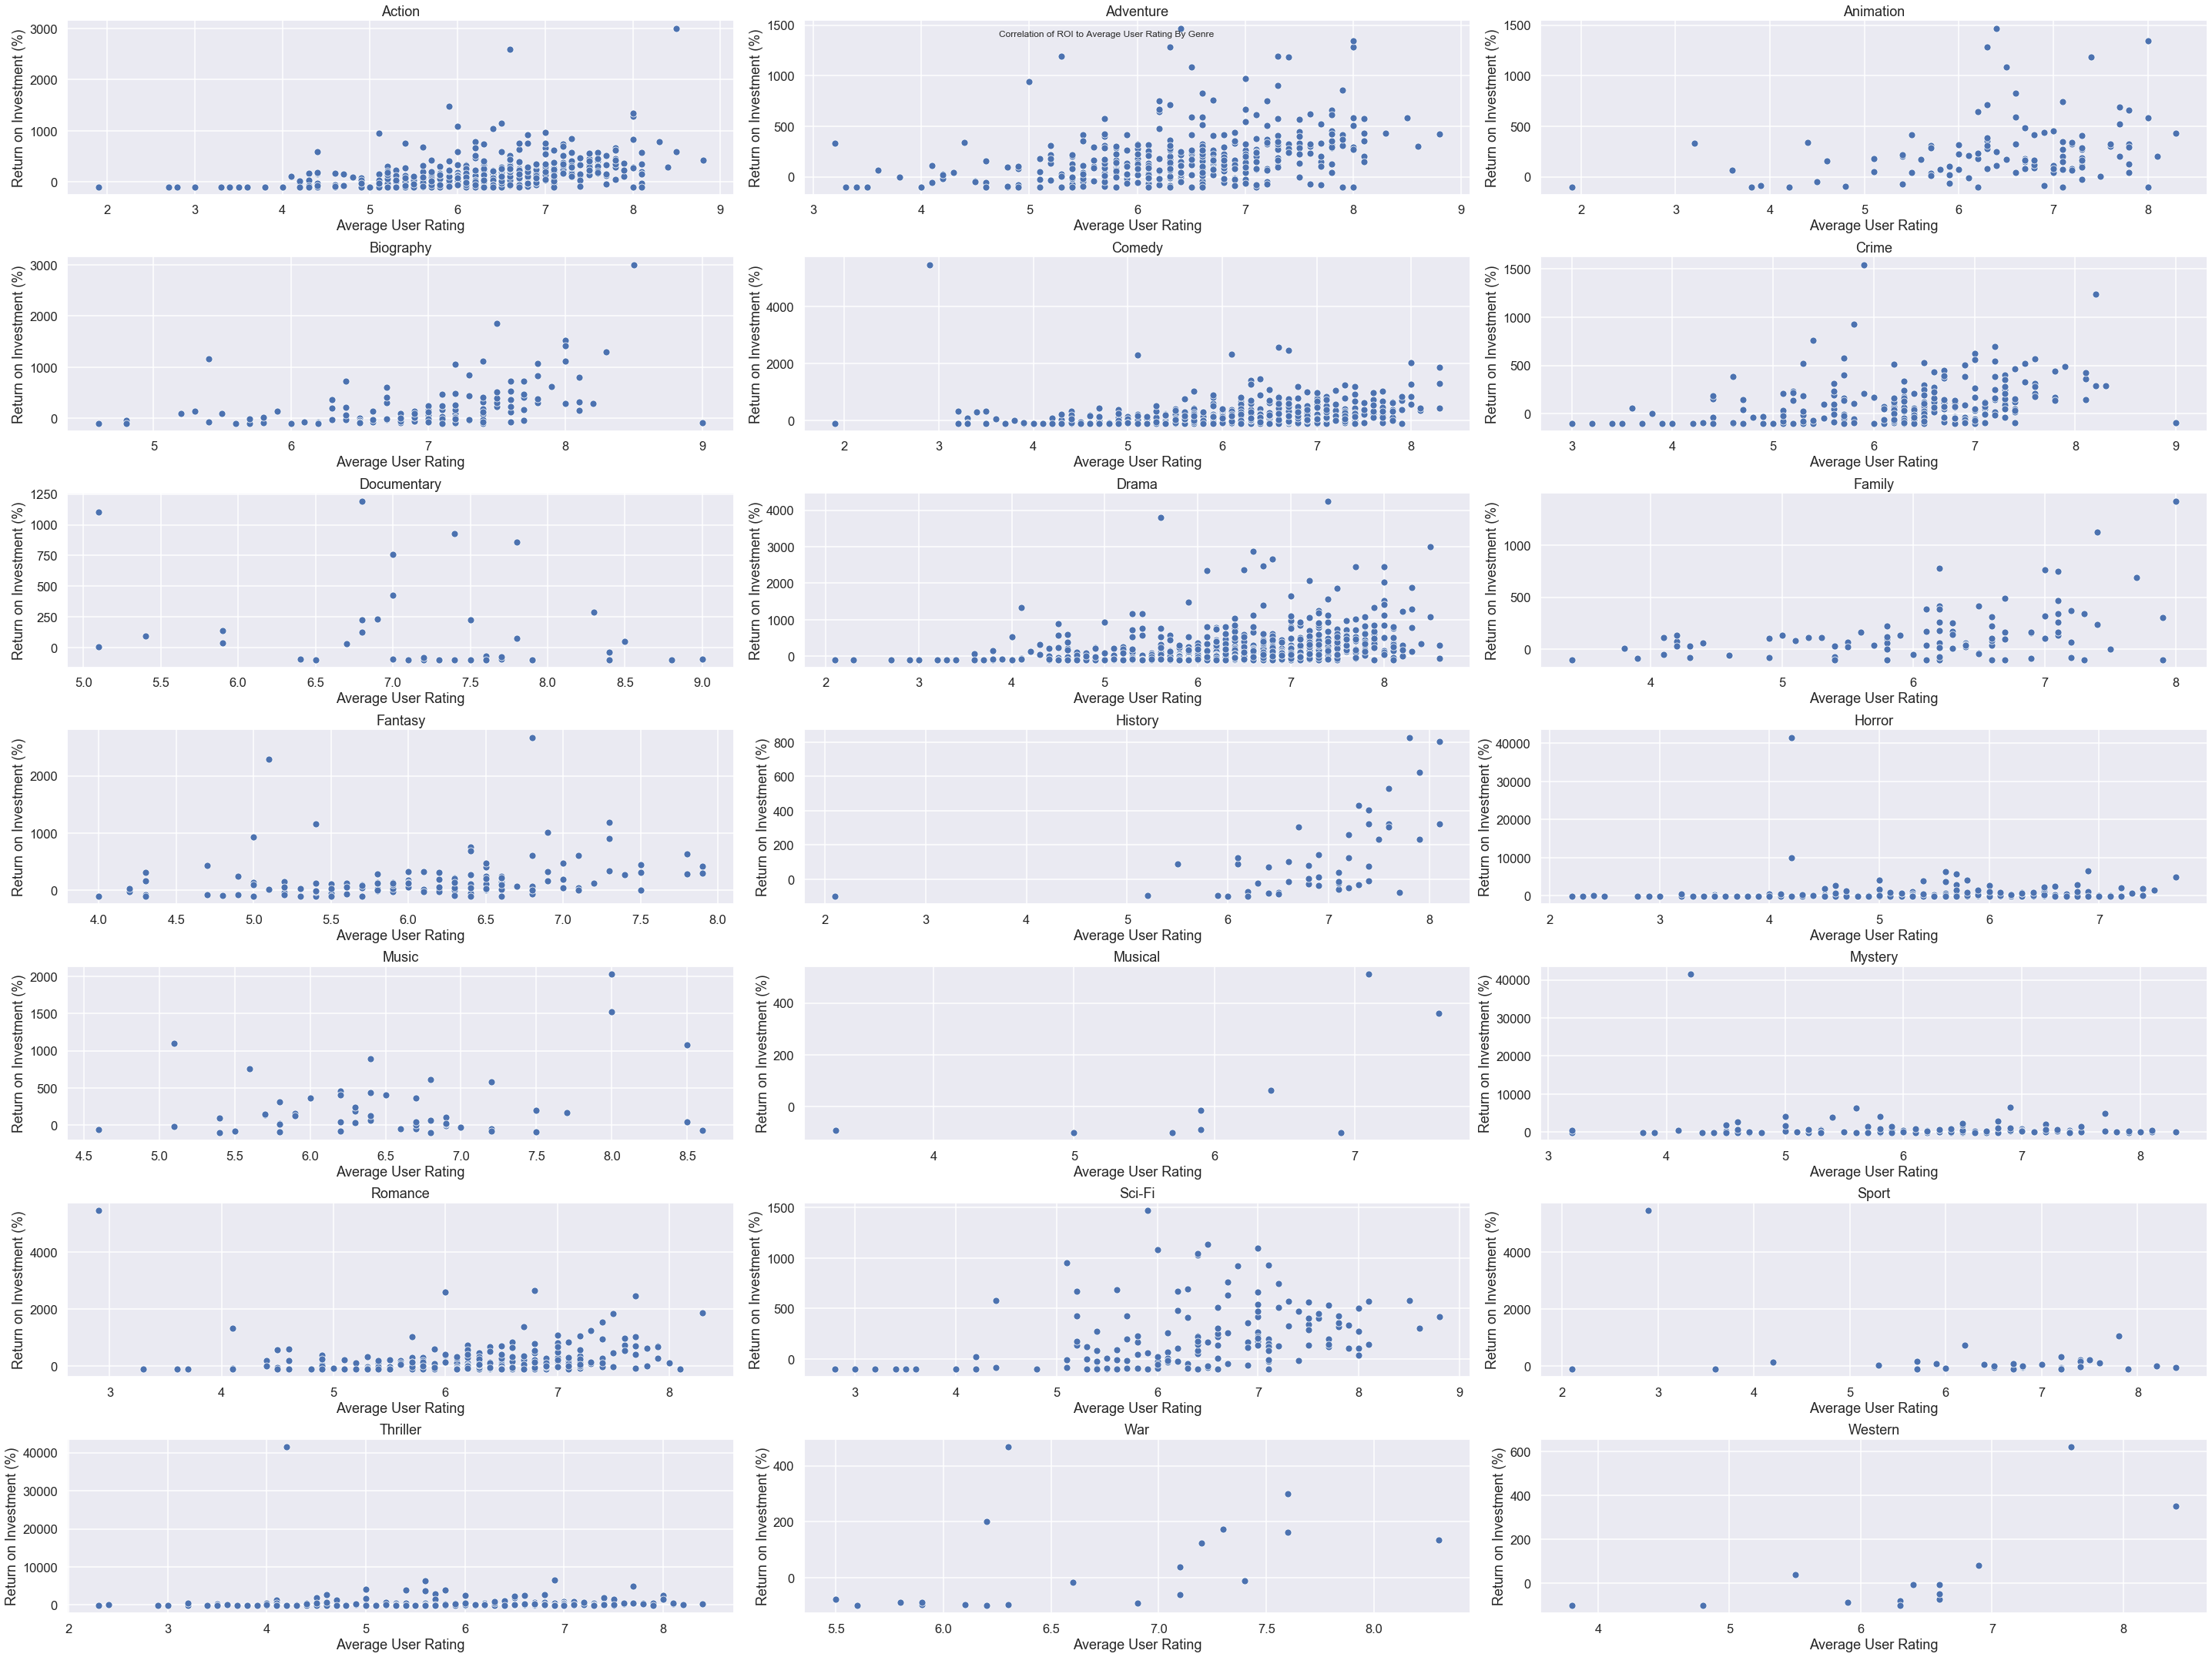

In [22]:
rows = 7
cols = 3
genre_subset_f7, genre_subset_ax7 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax7[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    sns.scatterplot(x='averagerating', y='ROI', data=cur_subset, ax=cur_ax)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Average User Rating')
    cur_ax.set_ylabel('Return on Investment (%)')

genre_subset_f7.suptitle('Correlation of ROI to Average User Rating By Genre')
genre_subset_f7.tight_layout()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


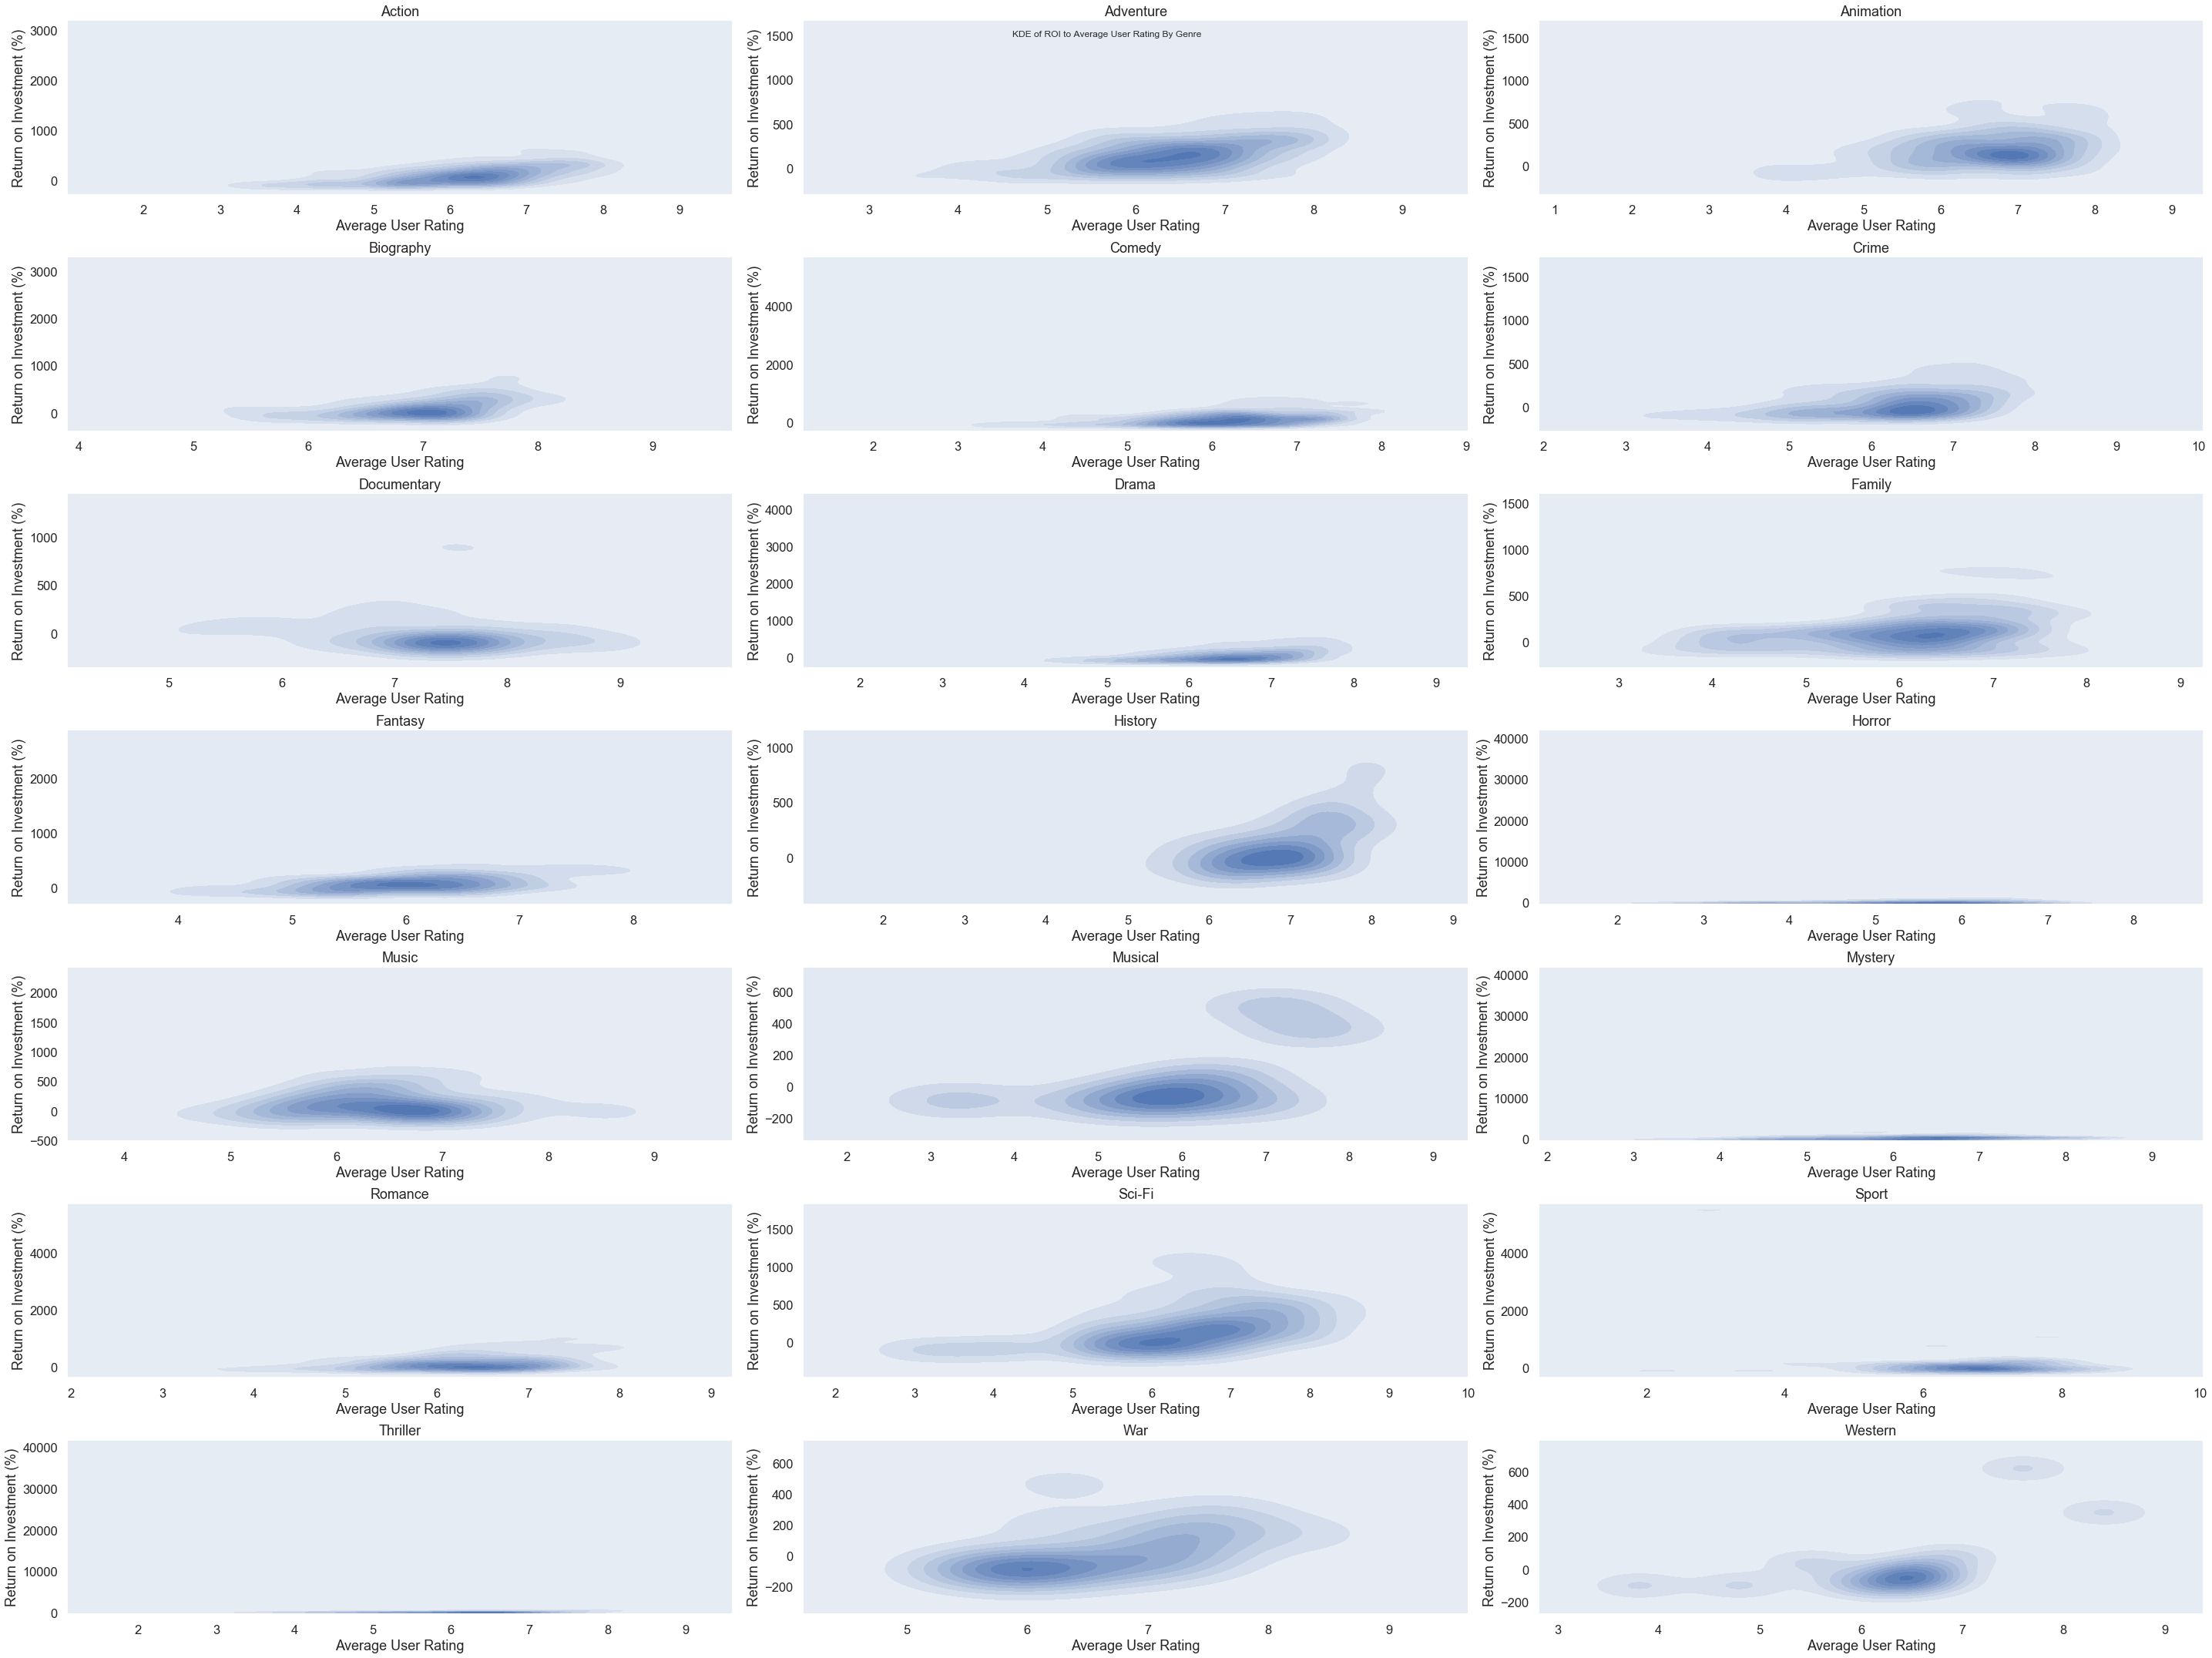

In [23]:
rows = 7
cols = 3
genre_subset_f8, genre_subset_ax8 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax8[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    sns.kdeplot(cur_subset.averagerating, cur_subset.ROI, ax=cur_ax, shade=True)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Average User Rating')
    cur_ax.set_ylabel('Return on Investment (%)')

genre_subset_f8.suptitle('KDE of ROI to Average User Rating By Genre')
genre_subset_f8.tight_layout()